In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

## **Business Understanding**   *** work in progress***

**Food recognition is an emerging topic in the field of computer vision. The recent interest of the research community in this area is justified by the rise in popularity of food diary applications, where the users take note of their food intake for self-monitoring or to provide useful statistics to dietitians. However, manually annotating food intake can be a tedious task, thus explaining the need of a system that automatically recognizes food, and possibly its amount, from pictures acquired by mobile devices. In this work we propose an approach to food recognition which combines the strengths of different state-of-the-art classifiers, namely Convolutional Neural Networks, Extreme Learning Machines and Neural Trees. We show that the proposed architecture can achieve good results even with low computational power, as in the case of mobile devices.***


#### person wants to learn more, be creative, change the routine,
image have an app that recommends us recipes beased on the ingredients that we have.
therefore, i will need to build a classification model first and it is on that the project will focus on.
create a model that is accurate enough so that the recomendations could be efficients, assertives and effectives.
this project aims to find a high accurate multi classification model
is there any research that points to this use case being valuable?

what work or literature exists on the topic?

Is the business case geared to a user, a entrepreneurial venture or a business line proposal to a company? -this business case is to me as a investor/stakeholder

##  **Data Understanding**

To split folders with files (e.g. images) into train, validation and test (dataset) folders, I used a Python module, <i>split_mode</i>. 
To only split into training, validation and test set, I set a tuple to 'ratio', i.e, '(.8, .1, .1)'.
To have a better understanding of the data, I plotted some training data.

In [ ]:
import split_folders

input_folder = '../Food-Ingredients-Recognition/Data/ingredients/'
output_folder = '../Food-Ingredients-Recognition/Data/Split_Sets/'

# split_folders.ratio(input_folder, output=output_folder, seed=1337, ratio=(.8, .1, .1)) 


In [ ]:
input_path = '../Food-Ingredients-Recognition/Data/Split_Sets/'
train_dir = "../Food-Ingredients-Recognition/Data/Split_Sets/train/"
val_dir = "../Food-Ingredients-Recognition/Data/Split_Sets/val/"
test_dir = "../Food-Ingredients-Recognition/Data/Split_Sets/test/"

In [ ]:
import os
meat_images = os.listdir(train_dir + "meat")
fruits_vegetables = os.listdir(train_dir + "fruits_vegetables")
grains = os.listdir(train_dir + "grains")

In [ ]:
from skimage.transform import resize
import cv2
import skimage

def plotter(i):
    meat_prev = cv2.imread(train_dir+"meat/"+meat_images[i])
    meat_prev = skimage.transform.resize(meat_prev, (150, 150, 3))
    fruits_prev = cv2.imread(train_dir+"fruits_vegetables/"+fruits_vegetables[i])
    fruits_prev = skimage.transform.resize(fruits_prev, (150, 150, 3))# , mode = 'reflect')
    grains_prev = cv2.imread(train_dir+"grains/"+grains[i])
    grains_prev = skimage.transform.resize(grains_prev, (150, 150, 3))
    pair = np.concatenate((meat_prev, fruits_prev, grains_prev), axis=1)

    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
for i in range(5,10):
    plotter(i)

# Data Preparation


Before the modeling, I defined as constants values, image dimensions and batch_size.


In [ ]:
img_dims = 150
batch_size = 32
input_shape = (150, 150)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Function for Data generation objects
# def process_data(img_dims, batch_size):
train_datagen = ImageDataGenerator(rescale=1./255)#, zoom_range=[0.5,1.0], horizontal_flip=True, rotation_range=90)
val_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
train_g = train_datagen.flow_from_directory(directory=train_dir, 
                                            target_size=input_shape, 
                                            batch_size=batch_size,
                                            class_mode='categorical')


val_g = val_datagen.flow_from_directory(directory=val_dir, 
                                        target_size=input_shape,
                                         batch_size=batch_size, 
                                         class_mode='categorical')    

# Modeling - baseline


In [ ]:
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, SeparableConv2D, MaxPooling2D, LeakyReLU, Activation

base = Sequential([
        Conv2D(128, kernel_size=(3, 3), strides=1, activation='relu', padding='same', input_shape=(150, 150, 3)),
        MaxPooling2D(pool_size=(2,2),strides=2),
        Conv2D(64, kernel_size=(3, 3), strides=1, activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2,2),strides=2),
        Conv2D(32, kernel_size=(3, 3), strides=1, activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2,2),strides=2),
        Conv2D(16, kernel_size=(3, 3), strides=1, activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2,2),strides=2),
        Flatten(),
        Dense(8, activation='relu'),
        Dense(3, activation='softmax')
])

In [ ]:
base.compile(optimizer='adam', 
             loss='categorical_crossentropy',
             metrics=['accuracy'])
             
base.summary()

In [ ]:
# m =train_g.samples+val_g.samples #// batch_size
# m

In [ ]:
# Fit_generator function

hist_5 = base.fit_generator(generator=train_g,
                            steps_per_epoch=50,
                            epochs=20, 
                            validation_data=val_g,
                            validation_steps=val_g.samples // batch_size)
#50 /150

In [ ]:
# PLotting the model's output
def plot_model_sum(hist_b):
    acc = hist_b.history['accuracy']
    val_acc = hist_b.history['val_accuracy']
    loss = hist_b.history['loss']
    val_loss = hist_b.history['val_loss']
    epochs = range(len(acc))
    plt.plot(epochs, acc, 'teal', label='Train acc')
    plt.plot(epochs, val_acc, 'firebrick', label='Val acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'teal', label='Train loss')
    plt.plot(epochs, val_loss, 'firebrick', label='Val loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

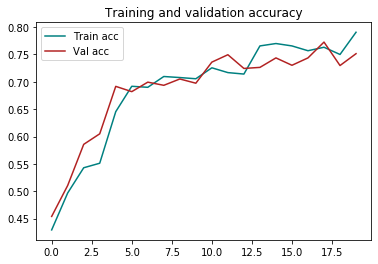

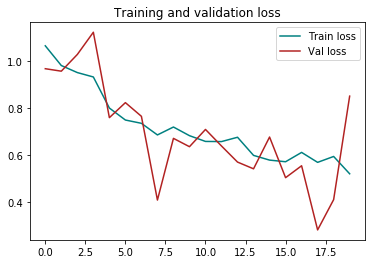

In [117]:
plot_model_sum(hist_5)

## Model 2 - augmentation

In [ ]:
train_aug = image_gen_train.flow_from_directory(directory=train_dir, 
                                            target_size=input_shape, 
                                            batch_size=batch_size,
                                            class_mode='categorical')


val_aug = image_gen_val.flow_from_directory(directory=val_dir, 
                                        target_size=input_shape,
                                         batch_size=batch_size, 
                                         class_mode='categorical')   

In [ ]:
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(150, 150 ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(8, activation='relu'),
    Dense(3)
])

In [ ]:
model_new.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

model_new.summary()

In [116]:
# Fit_generator function

history_new = model_new.fit_generator(generator=train_aug,
                            steps_per_epoch=50,
                            epochs=20, 
                            validation_data=val_aug,
                            validation_steps=val_g.samples // batch_size)
#50 /150

IndentationError: unexpected indent (<ipython-input-116-a435c8e3bf69>, line 4)

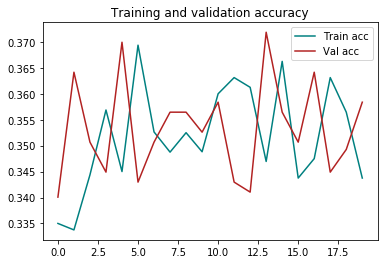

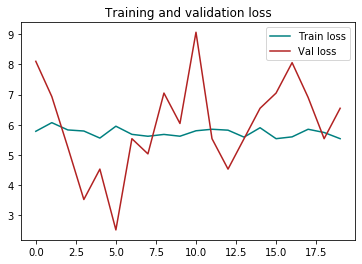

In [114]:
plot_model_sum(history_new)

# Evaluation

lets assumed the base model is the winning one..


In [ ]:
# test data generator
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_dir, 
                                                  target_size=(img_dims, img_dims), 
                                                  batch_size=20, 
                                                  class_mode='categorical')

test_loss, test_acc = base.evaluate_generator(test_generator, steps=50)
print('Test acc:', test_acc)

In [ ]:
# Create X and Y classes
test_images, test_labels = next(test_generator)

In [ ]:
test_labels

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix

preds = base.predict(test_images)

acc = accuracy_score(test_labels, np.round(preds))*100
cm = multilabel_confusion_matrix(test_labels, np.round(preds))
cm

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
plt.show()